In [2]:
# import library

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.graph_objects as go
from fbprophet import Prophet
import pycountry
import plotly.express as px
from collections import namedtuple

In [3]:
# read data

df = pd.read_csv('covid_19_data.csv',parse_dates=['Last Update'])
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)

df_confirmed = pd.read_csv("time_series_covid_19_confirmed.csv")
df_recovered = pd.read_csv("time_series_covid_19_recovered.csv")
df_deaths = pd.read_csv("time_series_covid_19_deaths.csv")

df_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)
df_recovered.rename(columns={'Country/Region':'Country'}, inplace=True)
df_deaths.rename(columns={'Country/Region':'Country'}, inplace=True)

In [21]:
df.Country.unique()

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia',
       'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France',
       'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast',
       'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy',
       'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt',
       'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan',
       'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia',
       'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia',
       'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands',
       'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania',
       'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic',
       'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal',
       'Andorra', 'Latvia

In [4]:
df_confirmed.head()

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,34366,34451,34455,34740,34994,35070,35229,35301,35475,35526
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3371,3454,3571,3667,3752,3851,3906,4008,4090,4171
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,18712,19195,19689,20216,20770,21355,21948,22549,23084,23691
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,855,855,858,861,862,877,880,880,880,884
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,462,506,525,541,576,607,638,687,705,749


In [9]:
df_confirmed.rename(columns={'Province/State':'State'}, inplace=True)
df_recovered.rename(columns={'Province/State':'State'}, inplace=True)
df_deaths.rename(columns={'Province/State':'State'}, inplace=True)
df.rename(columns={'Province/State':'State'}, inplace=True)

In [6]:
df_confirmed.head()

,State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,34366,34451,34455,34740,34994,35070,35229,35301,35475,35526
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3371,3454,3571,3667,3752,3851,3906,4008,4090,4171
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,18712,19195,19689,20216,20770,21355,21948,22549,23084,23691
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,855,855,858,861,862,877,880,880,880,884
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,462,506,525,541,576,607,638,687,705,749


In [7]:
df_confirmed.State.unique()

array([nan, 'Australian Capital Territory', 'New South Wales',
       'Northern Territory', 'Queensland', 'South Australia', 'Tasmania',
       'Victoria', 'Western Australia', 'Alberta', 'British Columbia',
       'Grand Princess', 'Manitoba', 'New Brunswick',
       'Newfoundland and Labrador', 'Nova Scotia', 'Ontario',
       'Prince Edward Island', 'Quebec', 'Saskatchewan', 'Anhui',
       'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong', 'Guangxi',
       'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan', 'Hong Kong',
       'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu', 'Jiangxi', 'Jilin',
       'Liaoning', 'Macau', 'Ningxia', 'Qinghai', 'Shaanxi', 'Shandong',
       'Shanghai', 'Shanxi', 'Sichuan', 'Tianjin', 'Tibet', 'Xinjiang',
       'Yunnan', 'Zhejiang', 'Faroe Islands', 'Greenland',
       'French Guiana', 'French Polynesia', 'Guadeloupe', 'Mayotte',
       'New Caledonia', 'Reunion', 'Saint Barthelemy', 'St Martin',
       'Martinique', 'Aruba', 'Curacao', 'Sint

In [10]:
## Group the case by Country
df_grouped = df.groupby(["Date", "Country", "State"])[['SNo', 'Date', 'State', 'Country', 'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

In [11]:
df_grouped.head()

,Date,Country,State,SNo,Confirmed,Deaths,Recovered
0,01/22/2020,Hong Kong,Hong Kong,13,0.0,0.0,0.0
1,01/22/2020,Macau,Macau,21,1.0,0.0,0.0
2,01/22/2020,Mainland China,Anhui,1,1.0,0.0,0.0
3,01/22/2020,Mainland China,Beijing,2,14.0,0.0,0.0
4,01/22/2020,Mainland China,Chongqing,3,6.0,0.0,0.0


In [12]:
df_grouped.shape

(44121, 7)

In [13]:
df_grouped.describe()

,SNo,Confirmed,Deaths,Recovered
count,44121.000000,44121.000000,44121.000000,4.412100e+04
mean,37861.592258,10411.706852,559.521951,4.736056e+03
std,19508.128730,31749.739167,2278.744625,3.103087e+04
min,1.000000,0.000000,0.000000,0.000000e+00
25%,23047.000000,149.000000,2.000000,0.000000e+00
50%,39911.000000,1194.000000,20.000000,1.250000e+02
75%,54321.000000,5571.000000,214.000000,1.409000e+03
max,68558.000000,416434.000000,40718.000000,1.160087e+06


In [14]:
df_grouped.columns

Index(['Date', 'Country', 'State', 'SNo', 'Confirmed', 'Deaths', 'Recovered'], dtype='object')

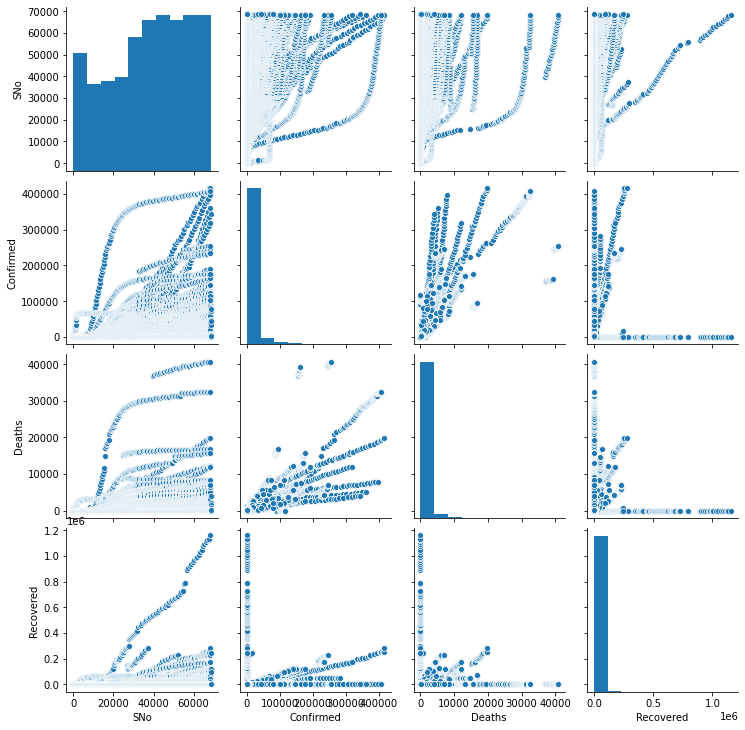

In [15]:
pairplot = sns.pairplot(df_grouped)

Text(0.5, 1.0, 'Confirmed Case over time')

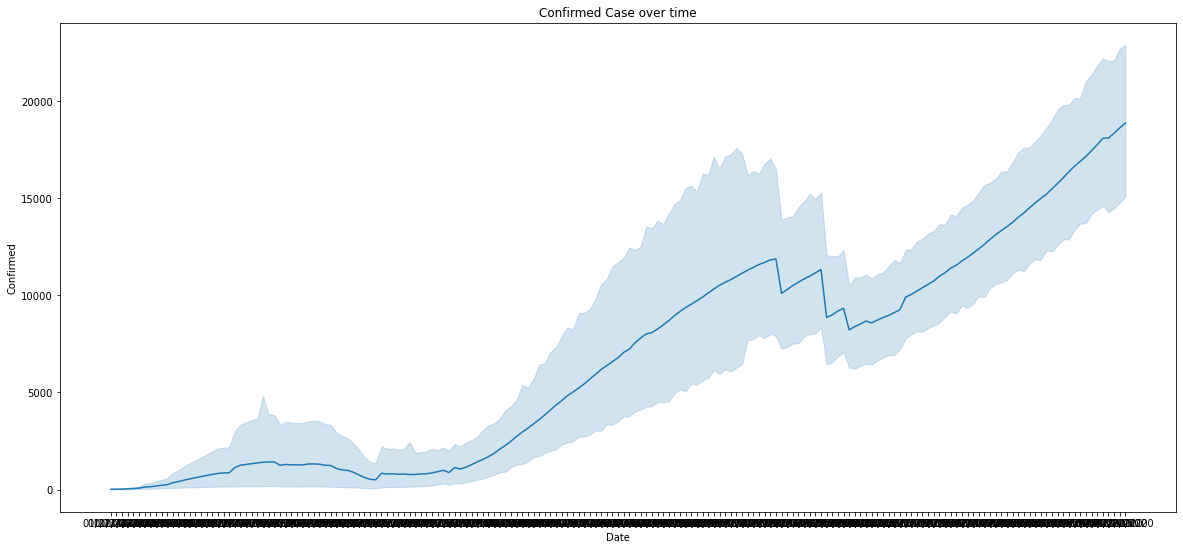

In [20]:
plt.figure(figsize=(20,9))
sns.lineplot(x="Date", y="Confirmed", data=df_grouped).set_title("Confirmed Case over time")

In [37]:
## Group by Saudi Arabia
df.query('Country=="Saudi Arabia"').groupby("Last Update")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

,Last Update,Confirmed,Deaths,Recovered
0,2020-03-02 23:53:02,3.0,0.0,0.0
1,2020-03-05 17:53:03,15.0,0.0,0.0
2,2020-03-08 05:31:00,4466.0,20.0,235.0
3,2020-03-08 10:13:19,11.0,0.0,0.0
4,2020-03-09 09:03:03,15.0,0.0,0.0
...,...,...,...,...
127,2020-07-17 04:34:50,243238.0,2370.0,187622.0
128,2020-07-18 04:34:45,245851.0,2407.0,191161.0
129,2020-07-19 04:34:58,248416.0,2447.0,194218.0
130,2020-07-20 05:34:40,250920.0,2486.0,197735.0


In [34]:
df.Country.count()

68558

In [38]:
sau = df[(df.Country == "Saudi Arabia")]

In [39]:
sau.head()

,SNo,Date,State,Country,Last Update,Confirmed,Deaths,Recovered
3062,3063,03/02/2020,NaN,Saudi Arabia,2020-03-02 23:53:02,1.0,0.0,0.0
3211,3212,03/03/2020,NaN,Saudi Arabia,2020-03-02 23:53:02,1.0,0.0,0.0
3373,3374,03/04/2020,NaN,Saudi Arabia,2020-03-02 23:53:02,1.0,0.0,0.0
3484,3485,03/05/2020,NaN,Saudi Arabia,2020-03-05 17:53:03,5.0,0.0,0.0
3666,3667,03/06/2020,NaN,Saudi Arabia,2020-03-05 17:53:03,5.0,0.0,0.0


In [40]:
sau.Country.unique()

array(['Saudi Arabia'], dtype=object)

In [41]:
sau.count()

SNo            141
Date           141
State            0
Country        141
Last Update    141
Confirmed      141
Deaths         141
Recovered      141
dtype: int64

In [42]:
confirmed = sau.groupby('Date').sum()['Confirmed'].reset_index()
deaths = sau.groupby('Date').sum()['Deaths'].reset_index()
recovered = sau.groupby('Date').sum()['Recovered'].reset_index()

In [47]:
confirmed.head()

,Date,Confirmed
0,03/02/2020,1.0
1,03/03/2020,1.0
2,03/04/2020,1.0
3,03/05/2020,5.0
4,03/06/2020,5.0


In [48]:
deaths.head()

,Date,Deaths
0,03/02/2020,0.0
1,03/03/2020,0.0
2,03/04/2020,0.0
3,03/05/2020,0.0
4,03/06/2020,0.0


In [49]:
recovered.head()

,Date,Recovered
0,03/02/2020,0.0
1,03/03/2020,0.0
2,03/04/2020,0.0
3,03/05/2020,0.0
4,03/06/2020,0.0


In [44]:


fig = go.Figure()
fig.add_trace(go.Bar(x=confirmed['Date'],
                y=confirmed['Confirmed'],
                name='Confirmed',
                marker_color='blue'
                ))
fig.add_trace(go.Bar(x=deaths['Date'],
                y=deaths['Deaths'],
                name='Deaths',
                marker_color='Red'
                ))
fig.add_trace(go.Bar(x=recovered['Date'],
                y=recovered['Recovered'],
                name='Recovered',
                marker_color='Green'
                ))

fig.update_layout(
    title='Saudi Arabia Corona Virus Cases - Confirmed, Deaths, Recovered (Bar Chart)',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number of Cases',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.show()



In [45]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=confirmed['Date'], 
                         y=confirmed['Confirmed'],
                         mode='lines+markers',
                         name='Confirmed',
                         line=dict(color='blue', width=2)
                        ))
fig.add_trace(go.Scatter(x=deaths['Date'], 
                         y=deaths['Deaths'],
                         mode='lines+markers',
                         name='Deaths',
                         line=dict(color='Red', width=2)
                        ))
fig.add_trace(go.Scatter(x=recovered['Date'], 
                         y=recovered['Recovered'],
                         mode='lines+markers',
                         name='Recovered',
                         line=dict(color='Green', width=2)
                        ))
fig.update_layout(
    title='Saudi Arabia Corona Virus Cases - Confirmed, Deaths, Recovered (Line Chart)',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number of Cases',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    )
)
fig.show()


In [46]:
sau.State.unique()

array([nan], dtype=object)

In [53]:
## Time forcasting with FBPhophet
## Number of confirmed cases
## Forecasting Confirmed case


confirmed.rename(columns={'Date':'ds', 'Confirmed':'y'}, inplace=True)
deaths.rename(columns={'Date':'ds', 'Deaths':'y'}, inplace=True)
recovered.rename(columns={'Date':'ds', 'Recovered':'y'}, inplace=True)
m = Prophet(interval_width=0.9, daily_seasonality=True)
m.fit(confirmed)
future = m.make_future_dataframe(periods=7) # 1 week
future_confirmed = future.copy() # for non-baseline predictions later on
future.tail()



INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


,ds
143,2020-07-23
144,2020-07-24
145,2020-07-25
146,2020-07-26
147,2020-07-27


In [54]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
143,2020-07-23,268686.626381,267027.835647,270523.549878
144,2020-07-24,272124.041685,270223.770323,274140.365610
145,2020-07-25,275509.074758,273321.678794,277758.554259
146,2020-07-26,278893.003625,276432.725843,281257.826517
147,2020-07-27,282383.337979,279355.115639,285243.470176


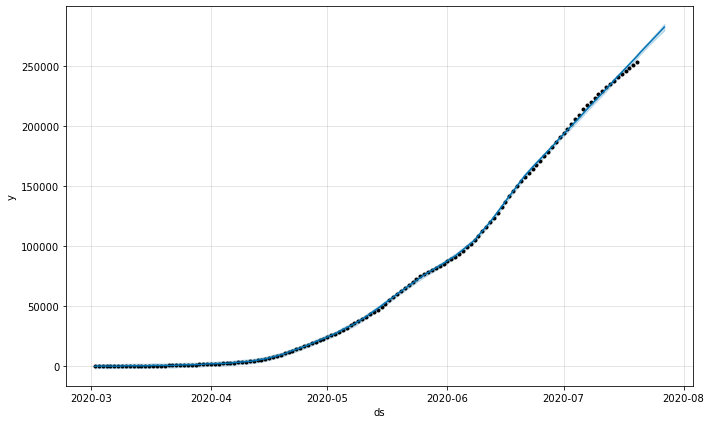

In [55]:
confirmed_forecast_plot = m.plot(forecast)

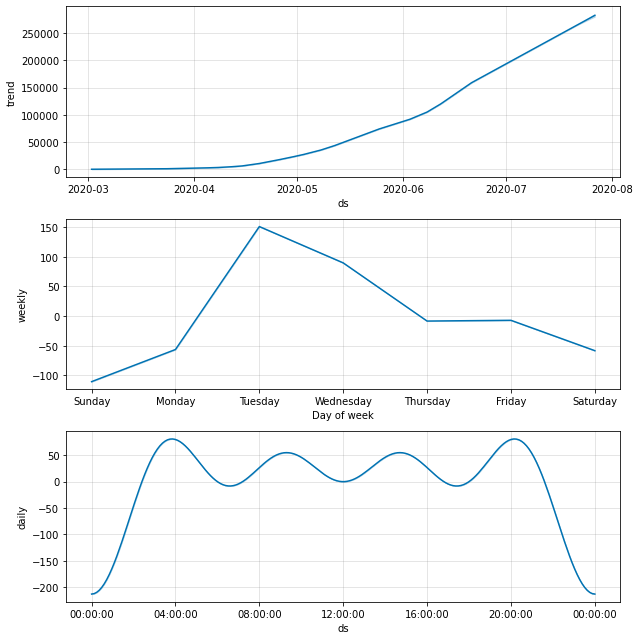

In [56]:
forecast_components = m.plot_components(forecast)

In [57]:
## Forecasting Death Rate

m = Prophet(interval_width=0.9, daily_seasonality=True)
m.fit(deaths)
future = m.make_future_dataframe(periods=7) # 1 week
future_death = future.copy() # for non-baseline predictions later on
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


,ds
143,2020-07-23
144,2020-07-24
145,2020-07-25
146,2020-07-26
147,2020-07-27


In [58]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
143,2020-07-23,2692.391252,2675.036618,2709.330147
144,2020-07-24,2737.251595,2718.079397,2755.825585
145,2020-07-25,2781.985335,2761.063450,2801.138528
146,2020-07-26,2826.427450,2804.940008,2845.828519
147,2020-07-27,2869.213859,2843.430431,2892.383059


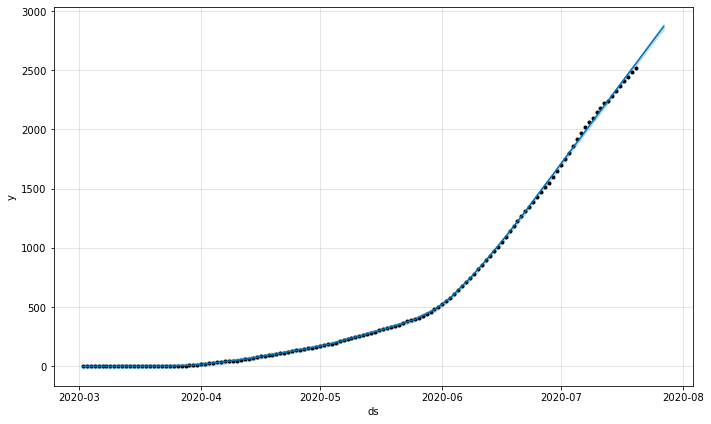

In [59]:
deaths_forecast_plot = m.plot(forecast)

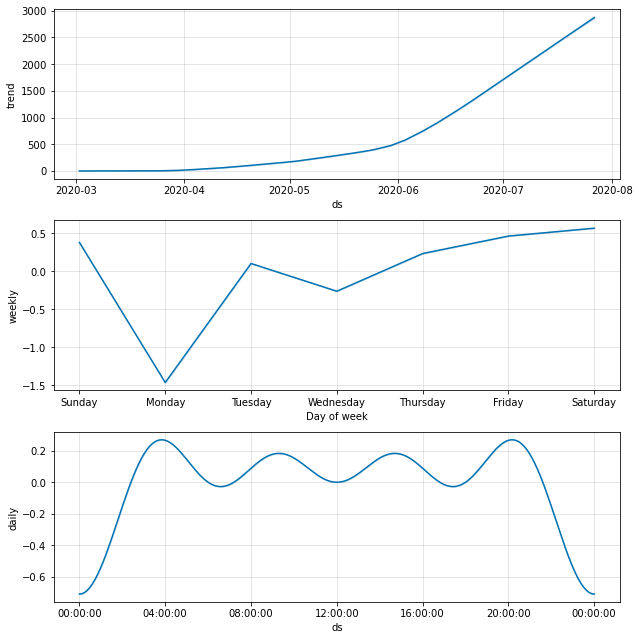

In [60]:
forecast_components = m.plot_components(forecast)

In [65]:
m = Prophet(interval_width=0.9, daily_seasonality=True)
m.fit(recovered)
future = m.make_future_dataframe(periods=7) # 1 week
future_recovered = future.copy() # for non-baseline predictions later on
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


,ds
143,2020-07-23
144,2020-07-24
145,2020-07-25
146,2020-07-26
147,2020-07-27


In [62]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
143,2020-07-23,208820.982242,206911.856624,210703.100690
144,2020-07-24,212055.003684,210142.862393,213959.360672
145,2020-07-25,215120.954306,213142.061572,217245.757011
146,2020-07-26,218292.809152,216071.434803,220706.087321
147,2020-07-27,221798.836562,219379.086885,224393.184303


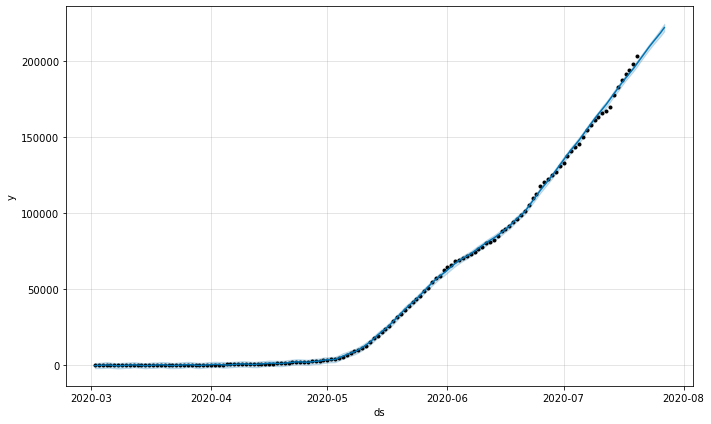

In [63]:
recovered_forecast_plot = m.plot(forecast)

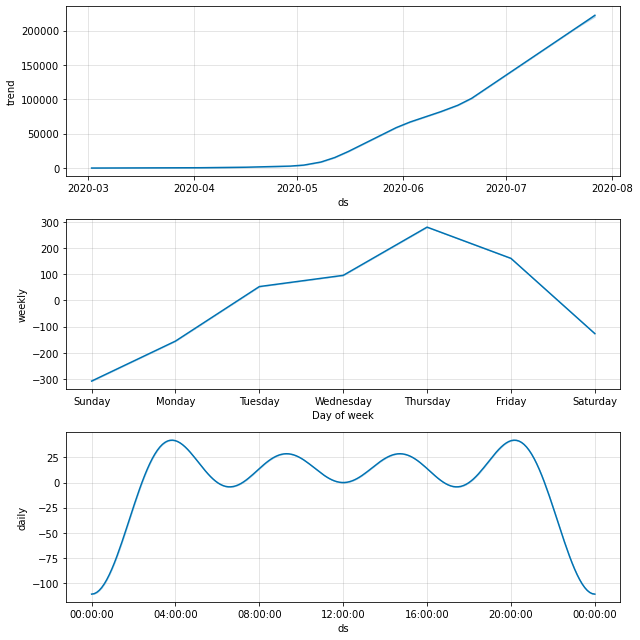

In [64]:
forecast_components = m.plot_components(forecast)
